# Regression Exercises

### Wrangle Lesson: Exercises II


#### Question 1: Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.


In [1]:
import wrangle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = wrangle.get_zillow()

#### Question 2: Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions using markdown and code commenting where helpful.


In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [4]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152852 non-null  float64
 1   bathroomcnt                   2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152370 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148421 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 115.0 MB


All columns are classified as numerical data (float64); all columns (excluding the 'fips' column) have some amount of non-null values.  Let's calculate how many are missing below.

In [5]:
for column in df.columns:
    print(f"{column} has {df[column].isnull().sum()} nulls.")

bedroomcnt has 11 nulls.
bathroomcnt has 11 nulls.
calculatedfinishedsquarefeet has 8484 nulls.
taxvaluedollarcnt has 493 nulls.
yearbuilt has 9337 nulls.
taxamount has 4442 nulls.
fips has 0 nulls.


In [6]:
# Dropping ALL nulls to see how much data remains.
df.dropna().shape[0] / df.shape[0]

0.9941343225277224

It looks like there are a lot of null values, however the dataset is very large, and even when I drop all null values I still retain 99.4% of all the data. Since the dataset is largely intact, I will choose to drop nulls rather than figure out how to deal with the nulls in more complicated and time consuming ways.

In [7]:
df = df.dropna()

In [8]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2140235 non-null  float64
 1   bathroomcnt                   2140235 non-null  float64
 2   calculatedfinishedsquarefeet  2140235 non-null  float64
 3   taxvaluedollarcnt             2140235 non-null  float64
 4   yearbuilt                     2140235 non-null  float64
 5   taxamount                     2140235 non-null  float64
 6   fips                          2140235 non-null  float64
dtypes: float64(7)
memory usage: 130.6 MB


In [9]:
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06
mean,3.301419e+00,2.240352e+00,1.863194e+03,4.606416e+05,1.960968e+03,5.616711e+03,6.048310e+03
std,9.325998e-01,9.905489e-01,1.221754e+03,6.771576e+05,2.215056e+01,7.814563e+03,2.034491e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,2.200000e+01,1.801000e+03,6.340000e+00,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.258000e+03,1.891660e+05,1.949000e+03,2.540850e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.623000e+03,3.282960e+05,1.958000e+03,4.111470e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.208000e+03,5.346060e+05,1.976000e+03,6.411930e+03,6.059000e+03
max,2.500000e+01,3.200000e+01,9.525760e+05,9.018846e+07,2.016000e+03,1.078102e+06,6.111000e+03


It looks like there are some odd values for a few columns where there are 0 bedrooms or bathrooms and sq footage or land tax value is 1.  Will explore below

In [10]:
# Looping through columns to show value_counts to see if there is anything else odd

for column in df.columns:
    print(df[column].value_counts())

3.0     962944
4.0     633608
2.0     334221
5.0     150671
6.0      25117
1.0      22895
7.0       4792
0.0       4397
8.0       1103
9.0        290
10.0       118
11.0        34
13.0        15
12.0        12
14.0         7
15.0         5
18.0         3
16.0         2
25.0         1
Name: bedroomcnt, dtype: int64
2.00     942463
3.00     422398
1.00     412582
2.50     142827
4.00      82039
1.50      31157
3.50      28464
5.00      28306
4.50      19474
6.00      10717
5.50       6201
7.00       4381
0.00       4274
8.00       1681
6.50       1330
9.00        707
7.50        382
10.00       322
11.00       145
8.50        108
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
19.50         1
14.50         1
32.00         1
19.00         1
Name: bathroomcnt, dtype: int64
1200.0     5184
1080.0     4376
1120.0     4

In [11]:
df[df.bedroomcnt == 0]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
15,0.0,0.0,203.0,14166.0,1960.0,163.79,6037.0
866,0.0,0.0,220.0,13840.0,1988.0,327.80,6037.0
2306,0.0,0.0,1776.0,79574.0,1989.0,1137.90,6037.0
...,...,...,...,...,...,...,...
2146660,0.0,0.0,676.0,234580.0,1922.0,3013.57,6037.0
2149054,0.0,0.0,938.0,56733.0,1978.0,986.86,6037.0
2152505,0.0,0.0,240.0,31234.0,1942.0,414.04,6037.0
2152704,0.0,1.0,1490.0,152000.0,1930.0,3614.40,6037.0


In [12]:
df[df.bathroomcnt == 0]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
15,0.0,0.0,203.0,14166.0,1960.0,163.79,6037.0
398,3.0,0.0,2239.0,396608.0,1988.0,4404.22,6111.0
753,3.0,0.0,2421.0,1111120.0,1976.0,12394.16,6111.0
...,...,...,...,...,...,...,...
2146189,0.0,0.0,330.0,16311.0,1925.0,297.36,6037.0
2146660,0.0,0.0,676.0,234580.0,1922.0,3013.57,6037.0
2149054,0.0,0.0,938.0,56733.0,1978.0,986.86,6037.0
2151453,2.0,0.0,1108.0,937075.0,1932.0,10851.50,6059.0


In [13]:
df[df.calculatedfinishedsquarefeet == 1]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
58438,2.0,1.0,1.0,121376.0,1907.0,1996.35,6037.0
1046787,0.0,0.0,1.0,28091.0,1963.0,439.55,6037.0
1276353,1.0,3.0,1.0,124906.0,1953.0,2020.66,6037.0
1359288,2.0,1.0,1.0,147577.0,1991.0,1855.40,6037.0
1895866,5.0,5.0,1.0,563977.0,1997.0,6808.84,6037.0
2017745,3.0,1.0,1.0,31800.0,1900.0,870.36,6037.0


After speaking with a realtor, I have determined the 0 or 1 values in these places are essentially meaningless placeholders from Zillow. As such I can treat them as nulls and as such I will be dropping them

In [14]:
df[df.calculatedfinishedsquarefeet < 70]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
32077,0.0,0.0,60.0,11534.0,2005.0,186.12,6037.0
53614,0.0,0.0,20.0,1124.0,2005.0,62.05,6037.0
58438,2.0,1.0,1.0,121376.0,1907.0,1996.35,6037.0
70053,4.0,0.0,31.0,405275.0,1938.0,4892.42,6037.0
118389,0.0,0.0,20.0,3455.0,2005.0,89.83,6037.0
...,...,...,...,...,...,...,...
2055863,0.0,0.0,20.0,1126.0,2005.0,62.08,6037.0
2088114,0.0,0.0,20.0,7246.0,2005.0,135.02,6037.0
2098808,0.0,0.0,60.0,5763.0,2005.0,117.34,6037.0
2098812,0.0,0.0,20.0,2875.0,2005.0,82.92,6037.0


Further, according to this article https://worldpopulationreview.com/state-rankings/minimum-house-size-by-state, the minimum sq footage required for a house is 70, so anything less than that is a either incorrectly entered data, wrong, or a placeholder. As such I will drop all rows where calculatedfinishedsquarefeet is less than 70.

In [15]:
df = df[(df.bedroomcnt != 0) & (df.bathroomcnt != 0) & (df.calculatedfinishedsquarefeet >= 70)]

In [16]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2134889 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2134889 non-null  float64
 1   bathroomcnt                   2134889 non-null  float64
 2   calculatedfinishedsquarefeet  2134889 non-null  float64
 3   taxvaluedollarcnt             2134889 non-null  float64
 4   yearbuilt                     2134889 non-null  float64
 5   taxamount                     2134889 non-null  float64
 6   fips                          2134889 non-null  float64
dtypes: float64(7)
memory usage: 130.3 MB


In [17]:
df.shape[0] / 2152863

0.9916511176047895

After all the drops we've done for null and invalid data we still retain 99.1% of the original data. I'm happy with this and will move on to simple visualization of the data to get a better sense of it.

#### Univariate visualization of the data

<AxesSubplot:xlabel='bedroomcnt', ylabel='Count'>

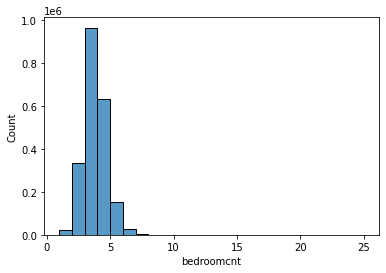

In [18]:
sns.histplot(x = 'bedroomcnt', data=df, binwidth=1)

<AxesSubplot:xlabel='bathroomcnt', ylabel='Count'>

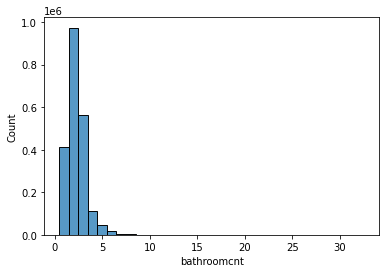

In [19]:
sns.histplot(x = 'bathroomcnt', data=df, binwidth = 1)

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='Count'>

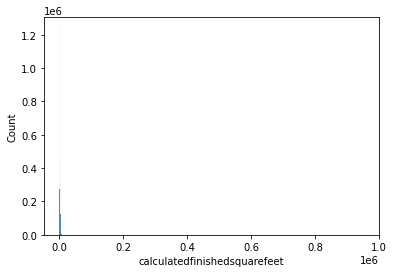

In [20]:
sns.histplot(x = 'calculatedfinishedsquarefeet', data=df, binwidth = 1000)

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='Count'>

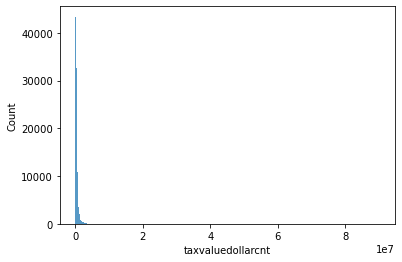

In [21]:
sns.histplot(x = 'taxvaluedollarcnt', data=df, binwidth=10000)

<AxesSubplot:xlabel='yearbuilt', ylabel='Count'>

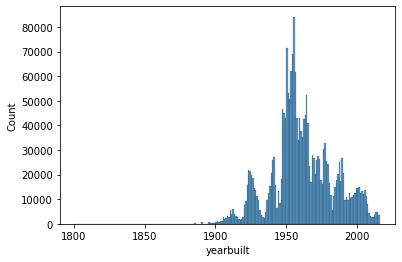

In [22]:
sns.histplot(x= 'yearbuilt', data = df, binwidth=1)

<AxesSubplot:xlabel='taxamount', ylabel='Count'>

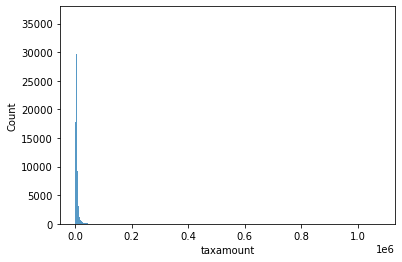

In [23]:
sns.histplot(x= 'taxamount', data = df, binwidth=100)

<AxesSubplot:xlabel='fips', ylabel='count'>

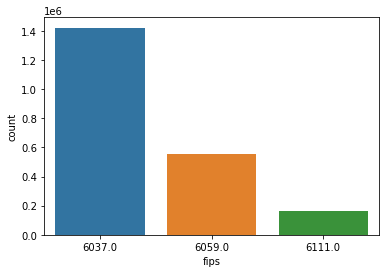

In [24]:
sns.countplot(x='fips', data =df)

6037 represents homes in Los Angeles County, California
6059 represents homes in Orange County, California
6111 represents homes in Ventura County, California

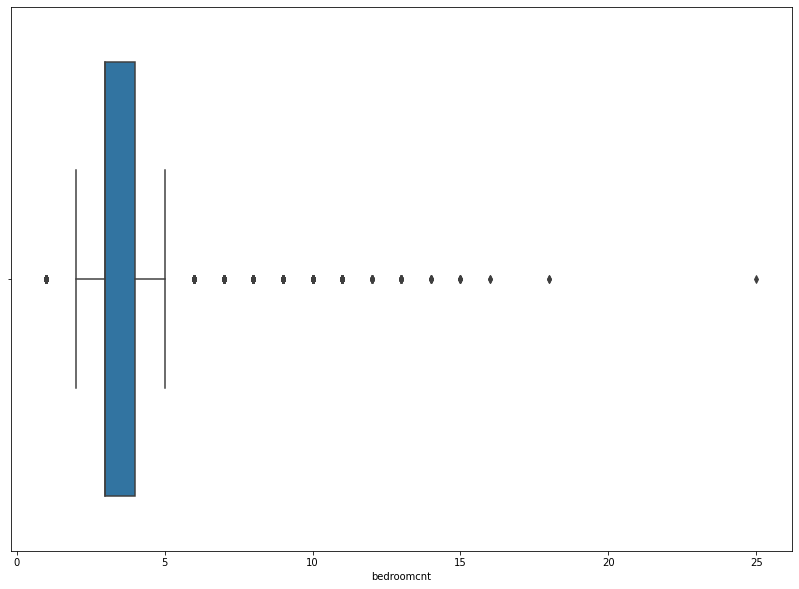

In [25]:
# Creating a box plot for the bedroom count
plt.figure(figsize=(14,10))

sns.boxplot(data=df, x ='bedroomcnt')
plt.show()

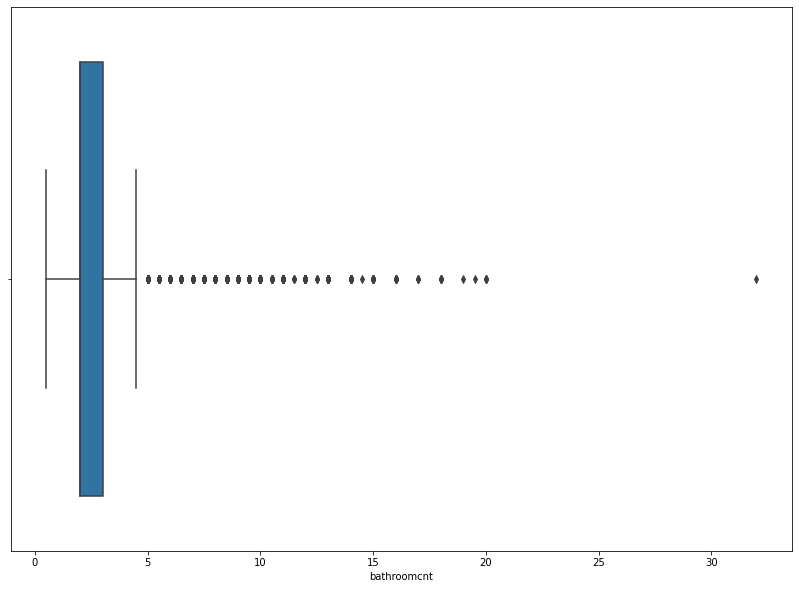

In [26]:
# Creating a box plot for the bathroom count
plt.figure(figsize=(14,10))

sns.boxplot(data=df, x ='bathroomcnt')
plt.show()

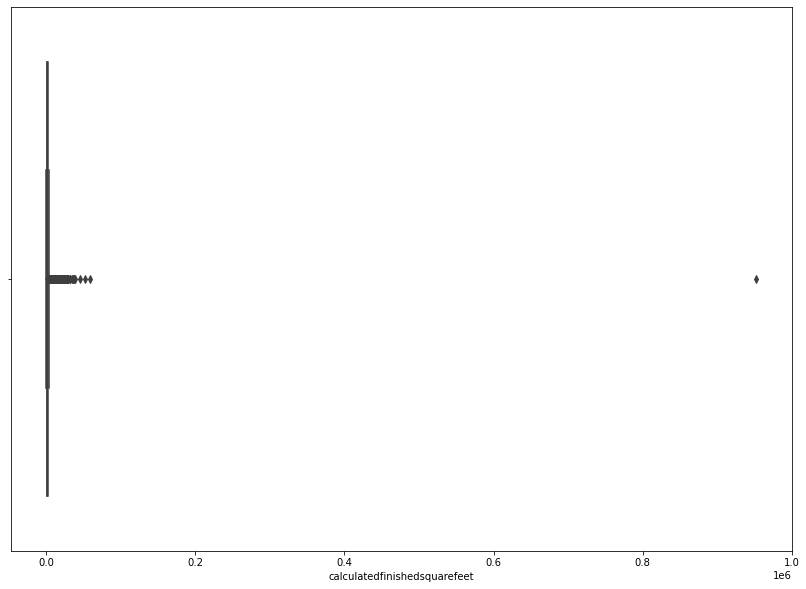

In [27]:
# Creating a box plot for calculatedfinishedsquarefeet
plt.figure(figsize=(14,10))

sns.boxplot(data=df, x ='calculatedfinishedsquarefeet')
plt.show()

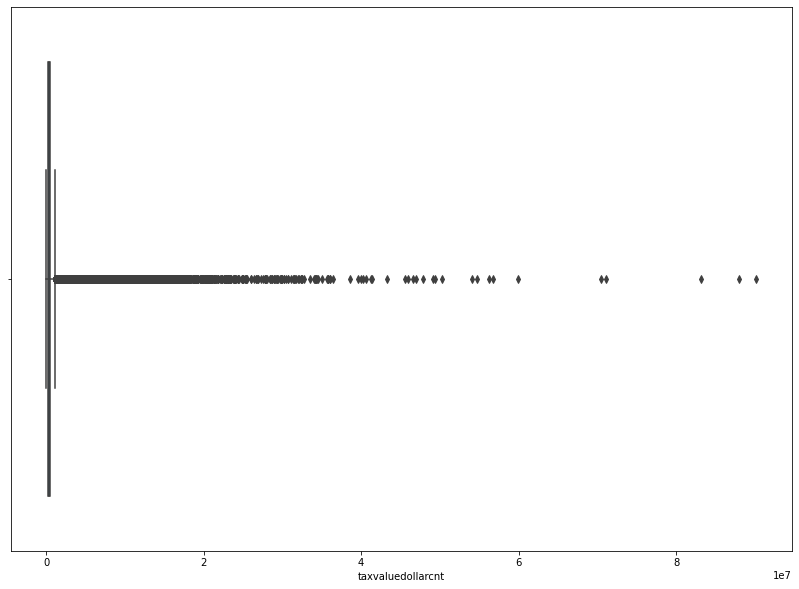

In [28]:
# Creating a box plot for taxvaluedollarcnt
plt.figure(figsize=(14,10))

sns.boxplot(data=df, x ='taxvaluedollarcnt')
plt.show()

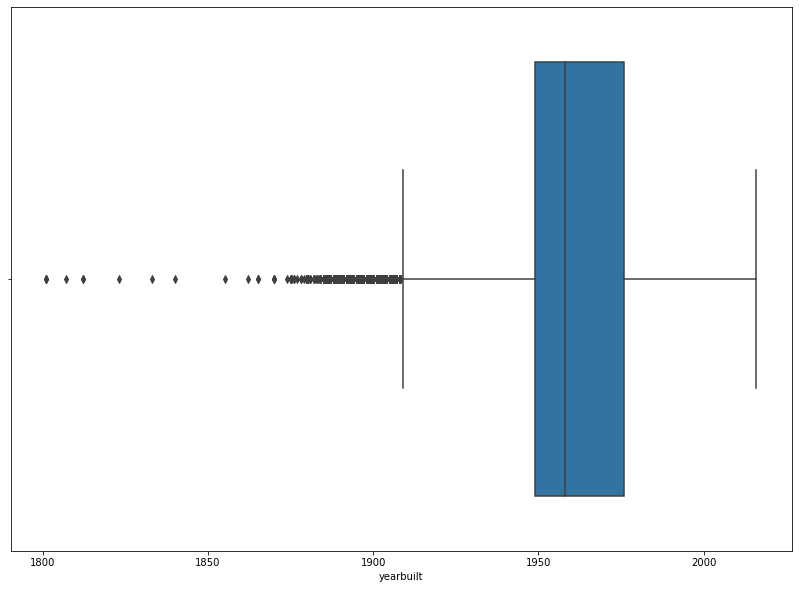

In [29]:
# Creating a box plot for the yearbuilt
plt.figure(figsize=(14,10))

sns.boxplot(data=df, x ='yearbuilt')
plt.show()

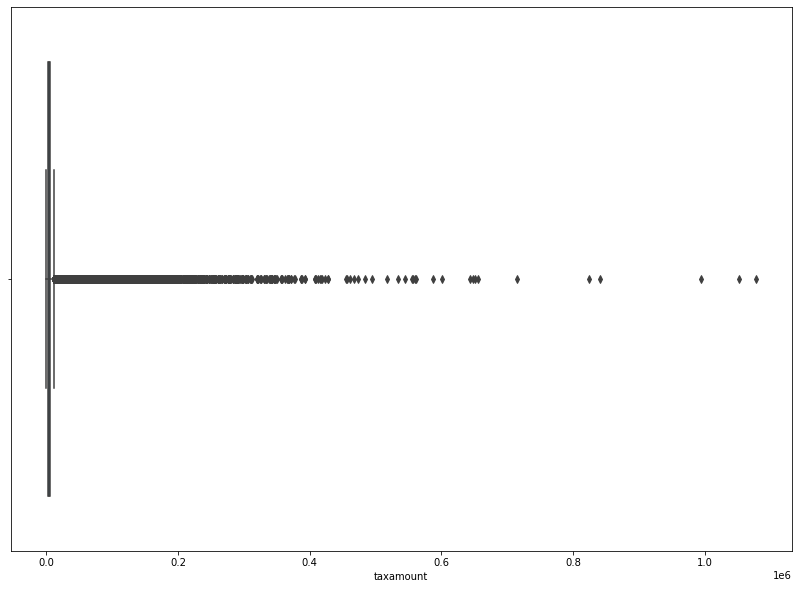

In [30]:
# Creating a box plot for the taxamount
plt.figure(figsize=(14,10))

sns.boxplot(data=df, x ='taxamount')
plt.show()

As seen above, outliers seem to be majorly playing into the shape and spread of the data which could skew a regression model. I will have to decide how I want to handle this at some point before modeling later.

For now I want to drop outliers with a z score of 3.5 or higher to visualize the data which is more representative of the majority of homes. I will create a function to find the non outliers below. After which I can replot the data

In [31]:
# Using a threshold of 3.5 for z score will still get back 99.977% of all data but reduce outliers.
def not_outlier(df_column, thresh=3.5):
    """
    Returns a boolean array with True if points are not outliers and False 
    otherwise.

    Parameters:
    -----------
        df_column : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(df_column.shape) == 1:
        df_column = np.array(df_column).reshape(-1,1)
    median = np.median(df_column, axis=0)
    diff = np.sum((df_column - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score < thresh


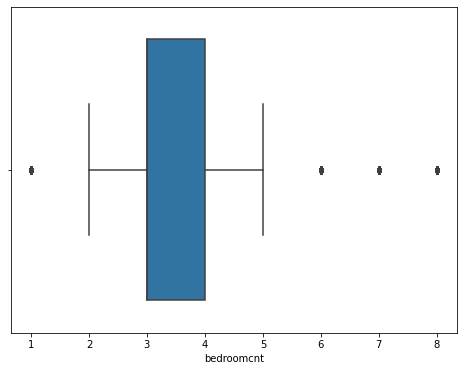

In [32]:
# Creating a box plot for the bedroomcnt without outliers about 3.5 z score
plt.figure(figsize=(8, 6))

sns.boxplot(data=df[not_outlier(df.bedroomcnt)], x ='bedroomcnt')
plt.show()

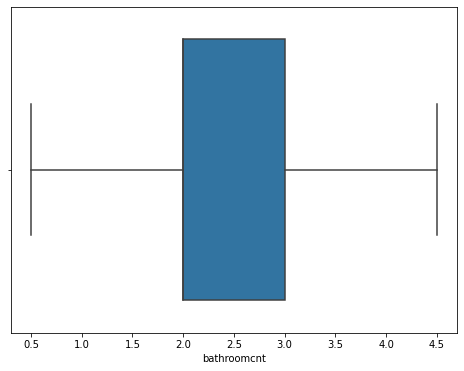

In [33]:
# Creating a box plot for the bathroomcnt without outliers about 3.5 z score
plt.figure(figsize=(8,6))

sns.boxplot(data=df[not_outlier(df.bathroomcnt)], x ='bathroomcnt')
plt.show()

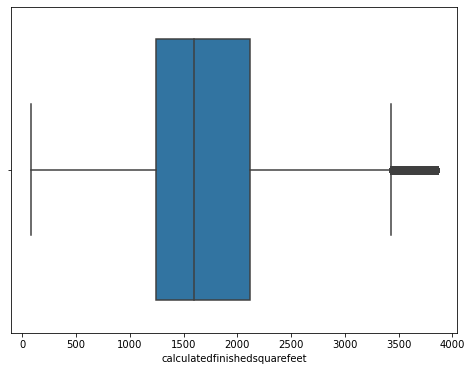

In [34]:
# Creating a box plot for the calculatedfinishedsquarefeet without outliers about 3.5 z score
plt.figure(figsize=(8,6))

sns.boxplot(data=df[not_outlier(df.calculatedfinishedsquarefeet)], x ='calculatedfinishedsquarefeet')
plt.show()

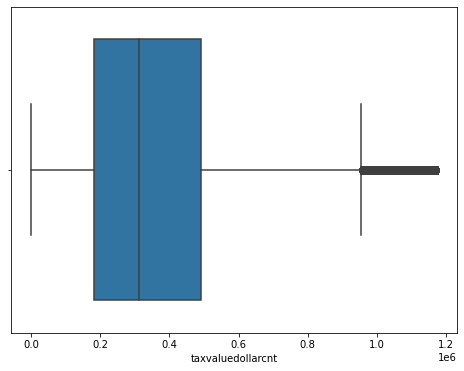

In [35]:

# Creating a box plot for the taxvaluedollarcnt without outliers about 3.5 z score
plt.figure(figsize=(8,6))

sns.boxplot(data=df[not_outlier(df.taxvaluedollarcnt)], x ='taxvaluedollarcnt')
plt.show()

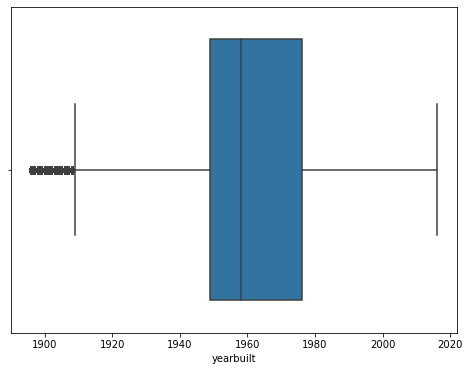

In [36]:
# Creating a box plot for the yearbuilt without outliers about 3.5 z score
plt.figure(figsize=(8,6))

sns.boxplot(data=df[not_outlier(df.yearbuilt)], x ='yearbuilt')
plt.show()

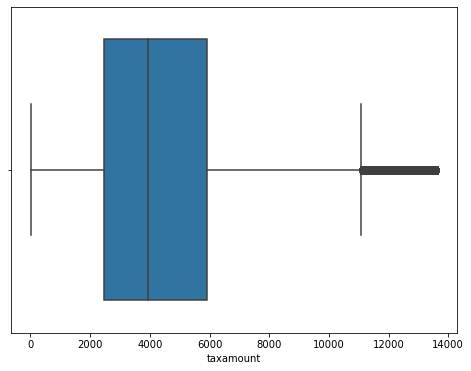

In [37]:
# Creating a box plot for the taxamount without outliers about 3.5 z score
plt.figure(figsize=(8,6))

sns.boxplot(data=df[not_outlier(df.taxamount)], x ='taxamount')
plt.show()

Will now revisualize the eariler plots without outliers

<AxesSubplot:xlabel='bedroomcnt', ylabel='Count'>

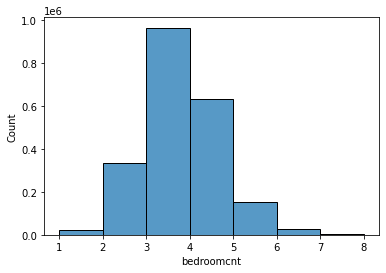

In [43]:
sns.histplot(x = 'bedroomcnt', data=df[not_outlier(df.bedroomcnt)], binwidth=1)

<AxesSubplot:xlabel='bathroomcnt', ylabel='Count'>

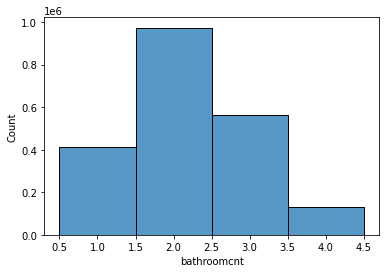

In [44]:
sns.histplot(x = 'bathroomcnt', data=df[not_outlier(df.bathroomcnt)], binwidth=1)

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='Count'>

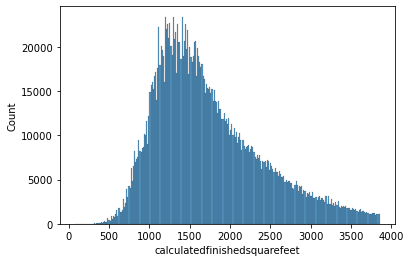

In [46]:
sns.histplot(x = 'calculatedfinishedsquarefeet', data=df[not_outlier(df.calculatedfinishedsquarefeet)])

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='Count'>

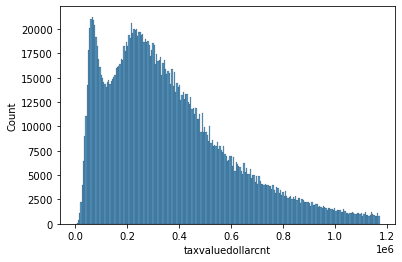

In [47]:
sns.histplot(x = 'taxvaluedollarcnt', data=df[not_outlier(df.taxvaluedollarcnt)])

<AxesSubplot:xlabel='taxamount', ylabel='Count'>

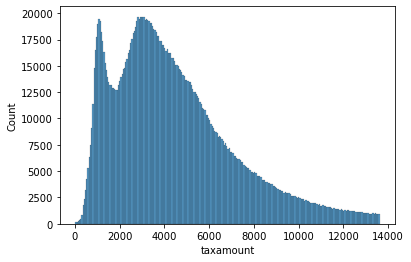

In [50]:
sns.histplot(x= 'taxamount', data = df[not_outlier(df.taxamount)])

<AxesSubplot:xlabel='yearbuilt', ylabel='Count'>

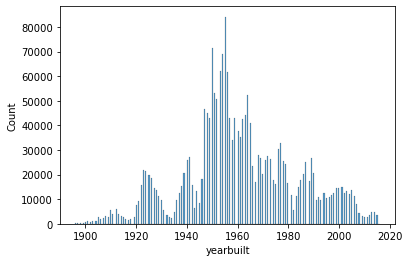

In [52]:
sns.histplot(x= 'yearbuilt', data = df[not_outlier(df.yearbuilt)])

In [38]:
df[not_outlier(df.taxvaluedollarcnt)].max()

bedroomcnt                           16.00
bathroomcnt                          20.00
calculatedfinishedsquarefeet     952576.00
taxvaluedollarcnt               1172628.00
yearbuilt                          2016.00
taxamount                        100379.34
fips                               6111.00
dtype: float64

In [39]:
df[df.bathroomcnt == 20.00]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
26485,25.0,20.0,11700.0,1608491.0,2010.0,19238.87,6037.0
1114403,3.0,20.0,80.0,95692.0,2006.0,1250.16,6037.0
1618393,7.0,20.0,28725.0,83196095.0,1938.0,994030.96,6037.0
2051558,14.0,20.0,16198.0,9359259.0,1952.0,14900.91,6037.0


When looking at the data I noticed that many of the values just don't make sense. In the cell above we see there is a 3 bedroom 20 bathroom house with 80 sq ft. This makes no sense and has to be bad data. There has to be a way to get rid of this non-sensical data.